In [1]:
from ase.io.trajectory import TrajectoryWriter as tw
from ase.io.trajectory import TrajectoryReader as tr

import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
import seaborn as sns

from publish_format import useLargeSize

import re

ansi_escape = re.compile(r"\x1B(?:[@-Z\\-_]|\[[0-?]*[ -/]*[@-~])")

/var/folders/s_/s1p_xb8n08x8djc3cxcpsm900000gn/T/ipykernel_4647/497210225.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import InsetPosition


## Comparison of trained model on validation dataset

In [17]:
val_energies = {}

file_dft = "../data/dft/r2_with_forces.traj"
file_dmc = "../data/dmc/dmc_r2.traj"
file_amptorch_dmc = "../train/amptorch_dmc/test_results/h2o_amptorch_dmc_r2.traj"
file_amptorch_dft = "../train/amptorch_dft_noforce/test_results/h2o_amptorch_dmc_r2.traj"

val_energies["dft"] = [traj.get_potential_energy() for traj in tr(file_dft)]
val_energies["dmc"] = [traj.get_potential_energy() for traj in tr(file_dmc)]
val_energies["amptorch_dmc"] = [traj.get_potential_energy() for traj in tr(file_amptorch_dmc)]
val_energies["amptorch_dft"] = [traj.get_potential_energy() for traj in tr(file_amptorch_dft)]

In [19]:
data = tr(file_dmc)
for image in data:
    print(image.get_distance(0, 2))

0.8672549999999997
0.8882499999999993
0.9092449999999996
0.9302400000000006
0.9512350000000003
0.9722299999999999
0.9932250000000001
1.014219999999999
1.0352149999999996
1.0562099999999992
0.6782999999999999
1.0772049999999995
1.0982000000000005
1.1191949999999995
1.1401899999999998
1.1611850000000001
1.1821799999999998
1.2031749999999994
1.224169999999999
1.245164999999999
1.266159999999999
0.6992950000000003
1.2871550000000003
1.3081500000000004
1.329145
1.3501399999999997
1.3711349999999995
1.3921299999999996
1.413125
1.434119999999999
1.4551150000000002
1.4761100000000005
0.7202899999999993
1.4971050000000006
1.5180999999999996
1.5390949999999999
1.5600899999999998
1.5810850000000007
1.6020800000000004
1.6230750000000007
1.6440700000000008
1.6650649999999994
1.6860599999999994
0.741284999999999
1.7070550000000004
1.72805
1.7490449999999997
1.77004
1.7910350000000013
1.812030000000001
1.8330250000000006
1.8540200000000002
1.875015000000001
1.89601
0.7622800000000006
1.91700499999999

In [20]:
for item in val_energies.keys():
    val_energies[item] = np.array(val_energies[item])
    val_energies[item] -= min(val_energies[item])
    # print(val_energies[item])

dft 61
dmc 60
amptorch_dmc 60
amptorch_dft 61


/Users/cancan/Dropbox (Brown)/000_Research/ML_DMC/examples/h2o_pyscf/notebooks_analysis/publish_format.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


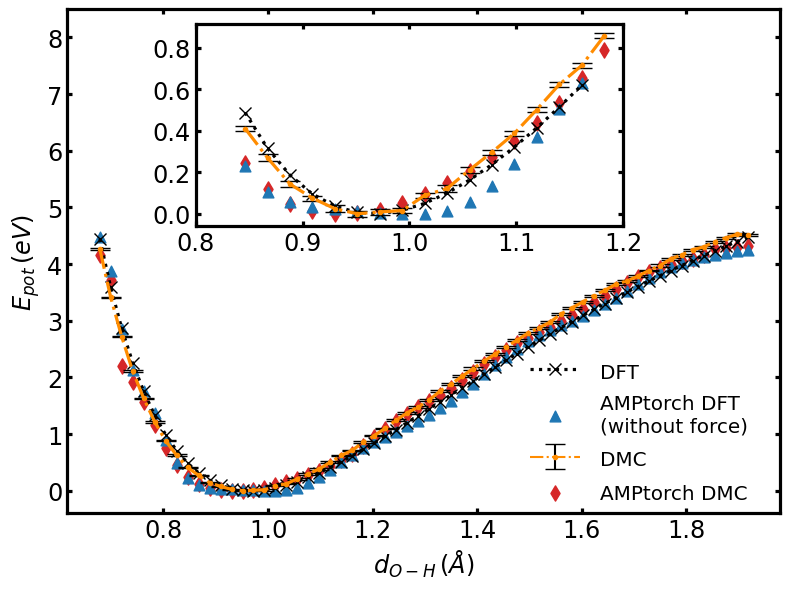

In [21]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(8,6))

for item in val_energies.keys():
    print(item, len(val_energies[item]))
    if item == "dmc":
        d_o_h = np.array([traj.get_distances(0,2)[0] for traj in tr(file_dmc)])
        error_bar_dmc = np.array([traj.info["uncertainty"] for traj in tr(file_dmc)])
        index = np.argsort(d_o_h)
        ax.errorbar(d_o_h[index], val_energies[item][index], yerr=error_bar_dmc[index], ecolor="k", capsize=7, c="darkorange", fmt=".", linestyle="dashdot", label="DMC")
    if item == "dft":
        d_o_h = [traj.get_distances(0,2)[0] for traj in tr(file_dft)]
        ax.plot(d_o_h[1:], val_energies[item][1:], linestyle="dotted", markersize=8, marker="x", c="k", label="DFT")
    if item == "amptorch_dmc":
        d_o_h = np.array([traj.get_distances(0,2)[0] for traj in tr(file_amptorch_dmc)])
        ax.scatter(d_o_h[index], val_energies[item][index], marker="d", s=60, c="tab:red", label="AMPtorch DMC")
    if item == "amptorch_dft":
        d_o_h = [traj.get_distances(0,2)[0] for traj in tr(file_amptorch_dft)]
        ax.scatter(d_o_h[1:], val_energies[item][1:], marker="^", s=60, c="tab:blue", label="AMPtorch DFT\n(without force)")

ax.set_xlabel(r"$d_{O-H}\,({\AA})$")
ax.set_ylabel(r"$E_{pot}\,(eV)$")
ax.set_ylim(-0.4, 8.5)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")

handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[2], handles[3], handles[1]]
labels = [labels[0], labels[2], labels[3], labels[1]]
ax.legend(handles,labels,loc=(0.635, 0.0), frameon=False, fontsize=18)

ax2 = plt.axes([0, 0, 1, 1])
ip = InsetPosition(ax, [0.18, 0.57, 0.6, 0.4])
start, end = 8, 25
ax2.set_axes_locator(ip)
for item in val_energies.keys():
    if item == "dmc":
        d_o_h = np.array([traj.get_distances(0,2)[0] for traj in tr(file_dmc)])
        error_bar_dmc = np.array([traj.info["uncertainty"] for traj in tr(file_dmc)])
        ax2.errorbar(d_o_h[index][start:end], val_energies[item][index][start:end], yerr=error_bar_dmc[start:end], ecolor="k", capsize=7, c="darkorange", fmt=".", linestyle="dashdot", label="DMC")
    if item == "dft":
        d_o_h = [traj.get_distances(0,2)[0] for traj in tr(file_dft)]
        ax2.plot(d_o_h[start+1:end], val_energies[item][start+1:end], linestyle="dotted", markersize=8, marker="x", c="k", label="DFT")
    if item == "amptorch_dmc":
        d_o_h = np.array([traj.get_distances(0,2)[0] for traj in tr(file_amptorch_dmc)])
        ax2.scatter(d_o_h[index][start:end], val_energies[item][index][start:end], marker="d", s=60, c="tab:red", label="AMPtorch DMC")
    if item == "amptorch_dft":
        d_o_h = [traj.get_distances(0,2)[0] for traj in tr(file_amptorch_dft)]
        ax2.scatter(d_o_h[start+1:end], val_energies[item][start+1:end], marker="^", s=60, c="tab:blue", label="AMPtorch DFT\n(without force)")

ax2.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.set_xticks(np.arange(0.8, 1.3, 0.1))

useLargeSize(plt, ax)
useLargeSize(plt, ax2)
# plt.savefig("./h2o_validation_Epot_R_pyscf.png", dpi=300)

In [22]:
val_energies = {}

file_dft = "../data/dft/theta_with_forces.traj"
file_dmc = "../data/dmc/dmc_theta.traj"
file_amptorch_dmc = "../train/amptorch_dmc/test_results/h2o_amptorch_dmc_theta.traj"
file_amptorch_dft = "../train/amptorch_dft_noforce/test_results/h2o_amptorch_dmc_theta.traj"

val_energies["dft"] = [traj.get_potential_energy() for traj in tr(file_dft)]
val_energies["dmc"] = [traj.get_potential_energy() for traj in tr(file_dmc)]
val_energies["amptorch_dmc"] = [traj.get_potential_energy() for traj in tr(file_amptorch_dmc)]
val_energies["amptorch_dft"] = [traj.get_potential_energy() for traj in tr(file_amptorch_dft)]

In [36]:
def select_elements(l):
    new_l = []
    for i in range(len(l)):
        if i == 0 or i >= 9:
            new_l.append(l[i])
    return np.array(new_l)

In [24]:
for item in val_energies.keys():
    val_energies[item] = np.array(val_energies[item])
    val_energies[item] -= min(val_energies[item])
    # print(item)
    # print(len(val_energies[item]))
    # print(val_energies[item])

/Users/cancan/Dropbox (Brown)/000_Research/ML_DMC/examples/h2o_pyscf/notebooks_analysis/publish_format.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


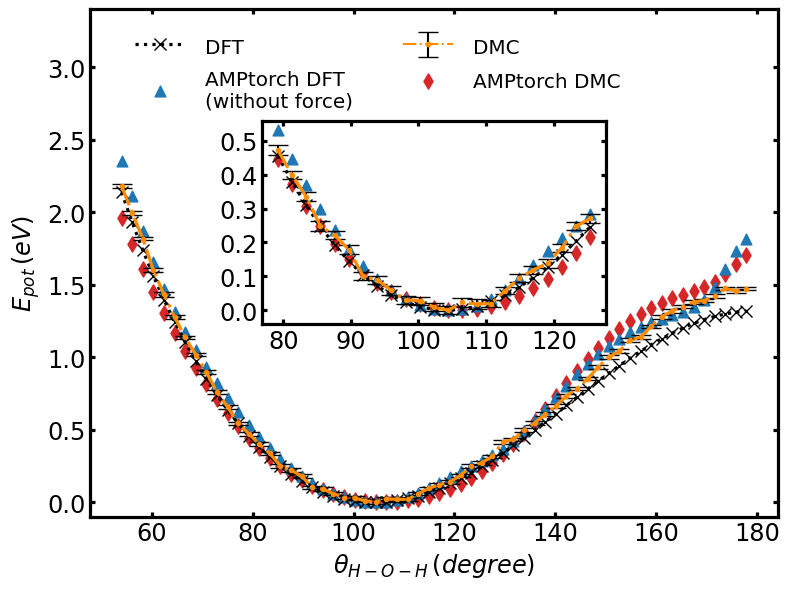

In [38]:
theta_o_h = np.array([traj.get_angle(1, 0, 2) for traj in tr(file_dmc)])
# theta_o_h = select_elements(theta_o_h)
index = np.argsort(theta_o_h)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8,6))

for item in val_energies.keys():
    if item == "dmc":
        # theta_o_h = np.array([traj.get_angle(1, 0, 2) for traj in tr(file_dmc)])
        error_bar_dmc = np.array([traj.info["uncertainty"] for traj in tr(file_dmc)])
        ax.errorbar(theta_o_h[index], val_energies[item][index], yerr=error_bar_dmc[index], ecolor="k", capsize=7, c="darkorange", fmt=".", linestyle="dashdot", label="DMC")
        
    if item == "dft":
        # theta_o_h = np.array([traj.get_angle(1, 0, 2) for traj in tr(file_dft)])
        ax.plot(theta_o_h[index], val_energies["dft"][1:], linestyle="dotted", markersize=8, marker="x", c="k", label="DFT")
        
    if item == "amptorch_dmc":
        # theta_o_h = np.array([traj.get_angle(1, 0, 2) for traj in tr(file_amptorch_dmc)])
        ax.scatter(theta_o_h[index], val_energies[item][index], marker="d", s=60, c="tab:red", label="AMPtorch DMC")
        
    if item == "amptorch_dft":
        # theta_o_h = np.array([traj.get_angle(1, 0, 2) for traj in tr(file_amptorch_dmc)])
        ax.scatter(theta_o_h[index], val_energies[item][1:], marker="^", s=60, c="tab:blue", label="AMPtorch DFT\n(without force)")

ax.set_xlabel(r"$\theta_{H-O-H}\,(degree)$")
ax.set_ylabel(r"$E_{pot}\,(eV)$")
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")

ax2 = plt.axes([0, 0, 1, 1])
ip = InsetPosition(ax, [0.25, 0.38, 0.5, 0.4])
start, end = 12,35
ax2.set_axes_locator(ip)
for item in val_energies.keys():
    if item == "dmc":
        # theta_o_h = np.array([traj.get_angle(1, 0, 2) for traj in tr(file_dmc)])
        error_bar_dmc = np.array([traj.info["uncertainty"] for traj in tr(file_dmc)])
        ax2.errorbar(theta_o_h[index][start:end], val_energies[item][index][start:end], yerr=error_bar_dmc[index][start:end], ecolor="k", capsize=7, c="darkorange", fmt=".", linestyle="dashdot", label="DMC")
        
    if item == "dft":
        # theta_o_h = np.array([traj.get_angle(1, 0, 2) for traj in tr(file_dft)])
        ax2.plot(theta_o_h[index][start:end], val_energies[item][1:][start:end], linestyle="dotted", markersize=8, marker="x", c="k", label="DFT")
        
    if item == "amptorch_dmc":
        # theta_o_h = np.array([traj.get_angle(1, 0, 2) for traj in tr(file_amptorch_dmc)])
        ax2.scatter(theta_o_h[index][start:end], val_energies[item][index][start:end], marker="d", s=60, c="tab:red", label="AMPtorch DMC")
    if item == "amptorch_dft":
        # theta_o_h = np.array([traj.get_angle(1, 0, 2) for traj in tr(file_amptorch_dmc)])
        ax2.scatter(theta_o_h[index][start:end], val_energies[item][1:][start:end], marker="^", s=60, c="tab:blue", label="AMPtorch DFT\n(without force)")

handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[2], handles[3], handles[1]]
labels = [labels[0], labels[2], labels[3], labels[1]]
ax.legend(handles, labels, loc=(0.05, 0.78),frameon=False, fontsize=18, ncol=2)
ax2.tick_params(axis="y")
ax2.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax.set_ylim(-0.1, 3.4)
useLargeSize(plt, ax)
useLargeSize(plt, ax2)
plt.savefig("./h2o_validation_Epot_theta.png", dpi=300)